### Applied Machine Learning 3

##### Date: March 25 2020
##### Author: Jung Ah Shin 
##### Data source:  https://www.kaggle.com/austinreese/craigslist-carstrucks-data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy

import warnings
warnings.filterwarnings('ignore')

import missingno as msno

from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV,RepeatedKFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet


from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.impute import SimpleImputer

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.compose import make_column_selector
from category_encoders import TargetEncoder, OrdinalEncoder

from sklearn.compose import TransformedTargetRegressor

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.inspection import permutation_importance

### Part 1 : Identify Features


In [ ]:
whole_data = pd.read_csv('vehicles.csv')
whole_data.head() #539759 rows × 25 columns #509577 rows * 25 columns

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,size,type,paint_color,image_url,description,county,state,lat,long
0,7088746062,https://greensboro.craigslist.org/ctd/d/cary-2...,greensboro,https://greensboro.craigslist.org,10299,2012.0,acura,tl,NaN,NaN,...,NaN,NaN,other,blue,https://images.craigslist.org/01414_3LIXs9EO33...,2012 Acura TL Base 4dr Sedan Offered by: B...,NaN,nc,35.7636,-78.7443
1,7088745301,https://greensboro.craigslist.org/ctd/d/bmw-3-...,greensboro,https://greensboro.craigslist.org,0,2011.0,bmw,335,NaN,6 cylinders,...,rwd,NaN,convertible,blue,https://images.craigslist.org/00S0S_1kTatLGLxB...,BMW 3 Series 335i Convertible Navigation Dakot...,NaN,nc,NaN,NaN
2,7088744126,https://greensboro.craigslist.org/cto/d/greens...,greensboro,https://greensboro.craigslist.org,9500,2011.0,jaguar,xf,excellent,NaN,...,NaN,NaN,NaN,blue,https://images.craigslist.org/00505_f22HGItCRp...,2011 jaguar XF premium - estate sale. Retired ...,NaN,nc,36.1032,-79.8794
3,7088743681,https://greensboro.craigslist.org/ctd/d/cary-2...,greensboro,https://greensboro.craigslist.org,3995,2004.0,honda,element,NaN,NaN,...,fwd,NaN,SUV,orange,https://images.craigslist.org/00E0E_eAUnhFF86M...,2004 Honda Element LX 4dr SUV Offered by: ...,NaN,nc,35.7636,-78.7443
4,7074612539,https://lincoln.craigslist.org/ctd/d/gretna-20...,lincoln,https://lincoln.craigslist.org,41988,2016.0,chevrolet,silverado k2500hd,NaN,NaN,...,NaN,NaN,NaN,NaN,https://images.craigslist.org/00S0S_8msT7RQquO...,"Shop Indoors, Heated Showroom!!!www.gretnaauto...",NaN,ne,41.1345,-96.2458


In [ ]:
whole_data.describe()

,id,price,year,odometer,county,lat,long
count,5.397590e+05,5.397590e+05,538772.000000,4.407830e+05,0.0,530785.000000,530785.000000
mean,7.087609e+09,1.954214e+05,2009.830982,1.008008e+05,NaN,38.432128,-94.040501
std,5.234176e+06,2.208252e+07,9.161334,1.767058e+05,NaN,5.916936,17.626658
min,7.065765e+09,0.000000e+00,0.000000,0.000000e+00,NaN,-84.911400,-176.810000
25%,7.084240e+09,4.400000e+03,2007.000000,4.703850e+04,NaN,34.197100,-106.782000
50%,7.088973e+09,9.500000e+03,2012.000000,9.330000e+04,NaN,39.077600,-88.100900
75%,7.092094e+09,1.792600e+04,2015.000000,1.377550e+05,NaN,42.449100,-81.219000
max,7.093537e+09,4.294967e+09,2021.000000,6.480922e+07,NaN,84.514800,161.016000


In [ ]:
whole_data.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'vin', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long'],
      dtype='object')

In [ ]:
whole_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539759 entries, 0 to 539758
Data columns (total 25 columns):
id              539759 non-null int64
url             539759 non-null object
region          539759 non-null object
region_url      539759 non-null object
price           539759 non-null int64
year            538772 non-null float64
manufacturer    516175 non-null object
model           531746 non-null object
condition       303707 non-null object
cylinders       321264 non-null object
fuel            536366 non-null object
odometer        440783 non-null float64
title_status    536819 non-null object
transmission    535786 non-null object
vin             315349 non-null object
drive           383987 non-null object
size            168550 non-null object
type            392290 non-null object
paint_color     365520 non-null object
image_url       539740 non-null object
description     539738 non-null object
county          0 non-null float64
state           539759 non-null obj

We can also observe missing data patterns through visualization as shown below. We can see that `county` feature is entirely missing. `size` seems to have a large number of missing data. Moreover, `condition`, `cylinders`, `vin`, `drive`, `type`, and `paint_color` all have numerous observations that are missing, although a specific missing pattern is difficult to observe from this plot.

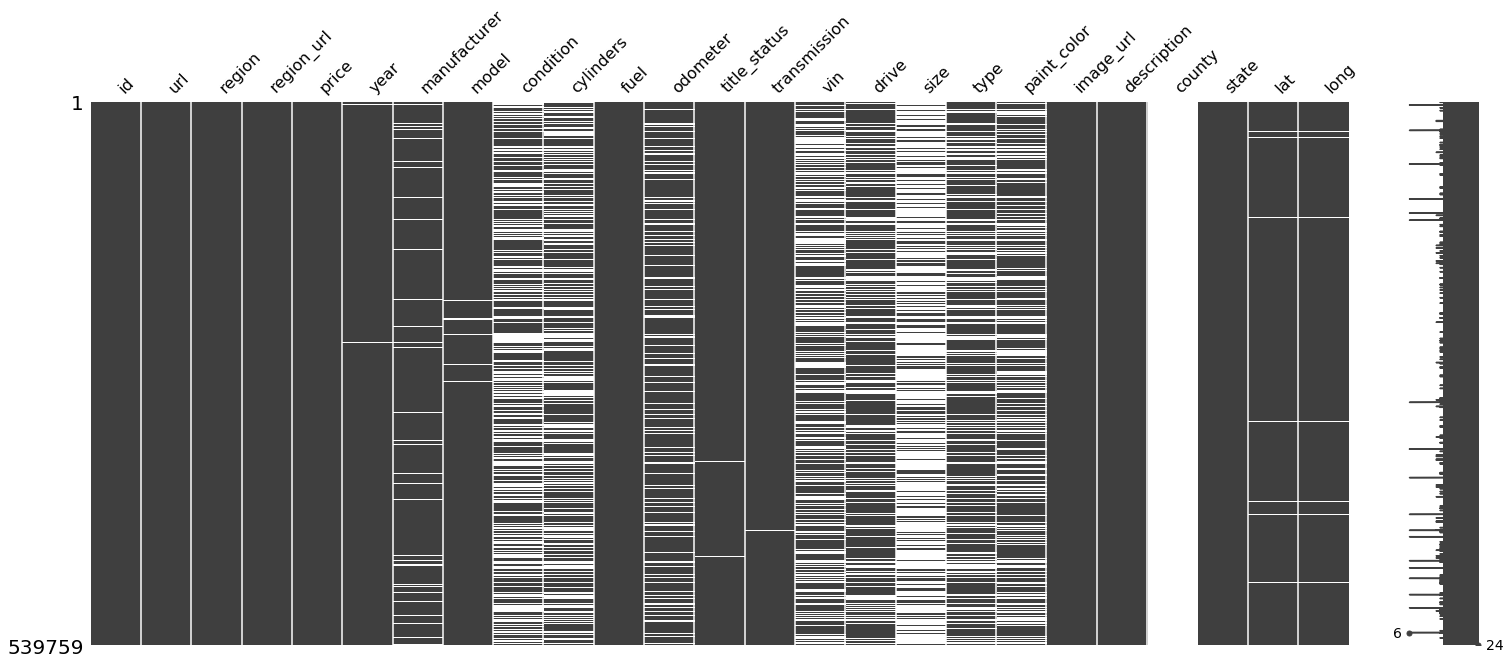

In [ ]:
msno.matrix(whole_data);

In [ ]:
# could drop description, url, region_url, image_url, vin, county
# target (y) : price

# continuous: year, odometer, lat, long
# categorical: region, manufacturer, model, condition, cylinders, fuel, title_status, 
#                transmission, drive, size, type, paint_color, state 

# Note: nunique don't include nan
# region: 403 unique (region and region url could be redundant)
# manufacturer: 43 unique
# model: 35852 unique 
# condition: 6 unique ('excellent', nan, 'good', 'like new', 'fair', 'new', 'salvage')
# cylinders: 8 unique ('4 cylinders', nan, '8 cylinders', '6 cylinders', '10 cylinders',
       # '5 cylinders', '3 cylinders', '12 cylinders', 'other')
# fuel: 5 unique ('gas', 'diesel', 'other', nan, 'electric', 'hybrid')
# title_status: 6 unique ('clean', 'rebuilt', 'salvage', 'lien', nan, 'missing',
       # 'parts only')
# transmission: 3 unique ('manual', 'automatic', 'other', nan)  
# vin: vehicle identification number ??? 
# drive: 3 unique ('4wd', nan, 'fwd', 'rwd')
# size: 4 unique ('compact', nan, 'mid-size', 'full-size', 'sub-compact')
# type: 13 unique 
# paint_color: 12 unique 
# state: 51 unique

Based on the feature descriptions provided, we can omit the feature `county`, as it states that this column was left in by mistake.

Since our goal is to predict the price of a used vehicle on craigslist, it would be reasonable to assume that the features that provide some information regarding the condition of the used car would generally be relevant in determining the price. While the given data has a mix of continuous and categorical features, it predominantly consists of categorical features. In terms of the continuous feature `odometer`, as well as the target variable (`price`), we can observe some outliers which will be further analyzed below.

`id` and `url` of a vehicle is unique to each vehicle, which could possibly leak the target information, so it should be excluded as features.
`description` feature was omitted for convenience. Further handling on such text data could provide meaningful information on the vehicle. For similar reasons, `region_url`, `image_url` are also omitted, and `vin` is not included in building the model, due to difficulty in interpretability of that feature. 

Furthermore, since location-related information can be redundant, features `region` and `state` would be used for analysis while `lat` and `long` will be dropped.  


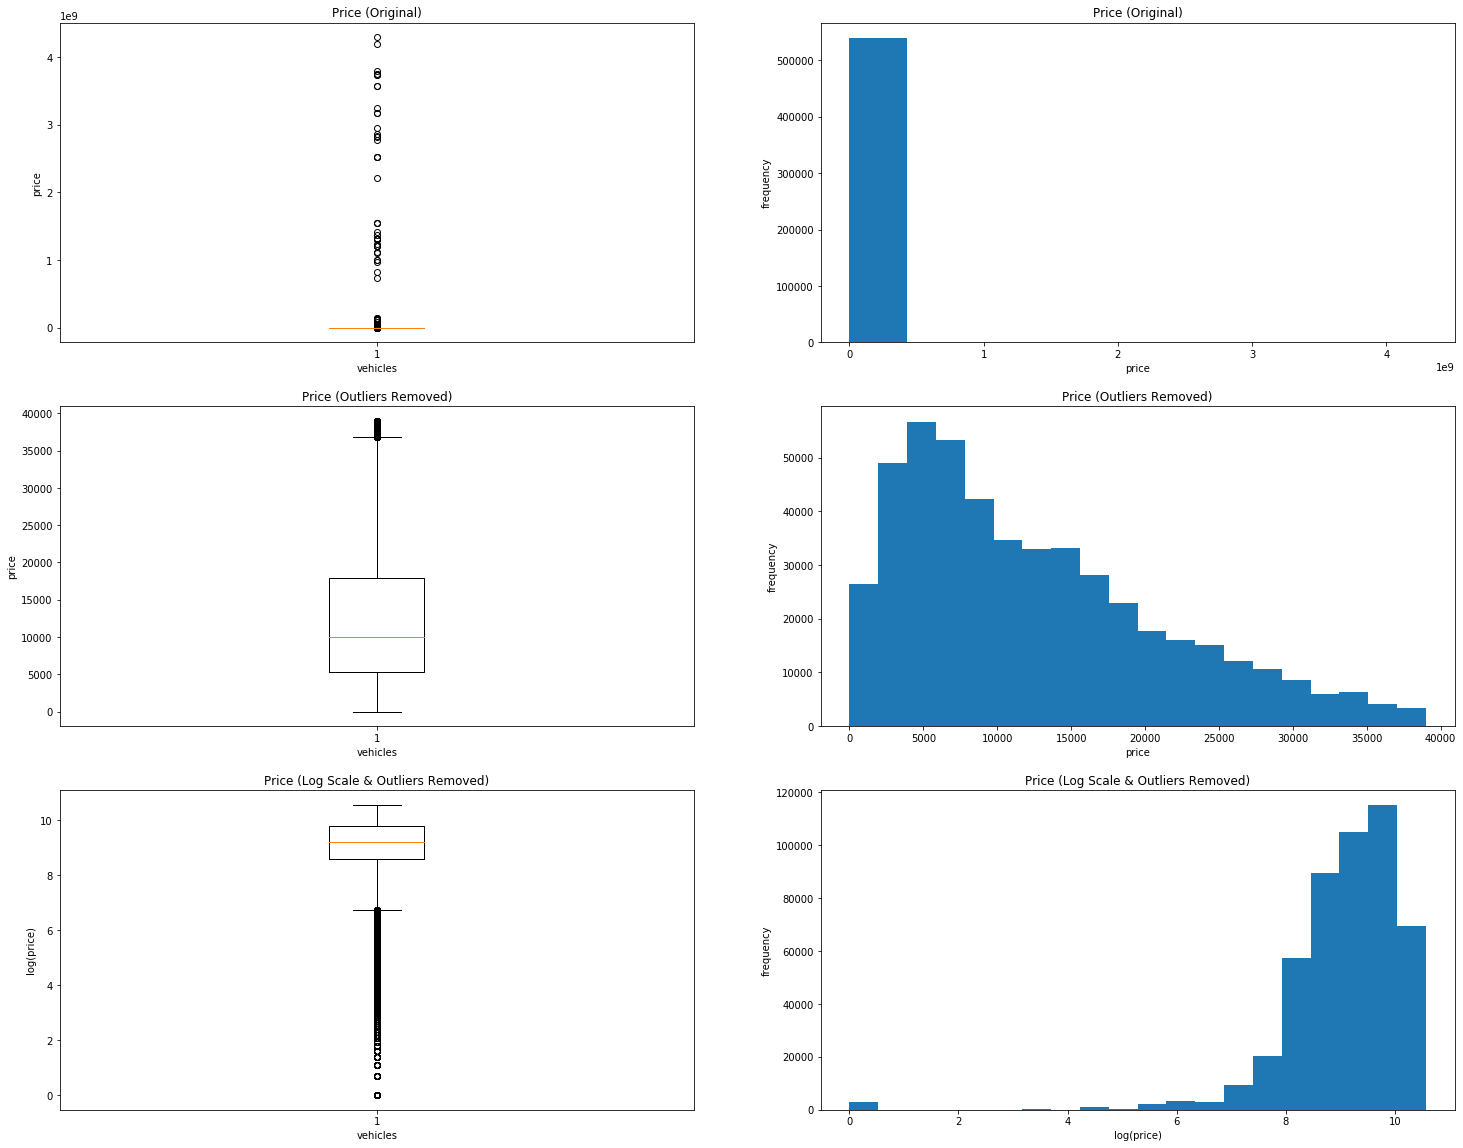

In [ ]:
### First drop 0 price before removing low/high price outliers
# There are 43579 rows with price 0

remove_0 = (whole_data['price'] != 0)
whole_data_1 = whole_data.loc[remove_0]
whole_data_1 #465998 rows × 25 columns

Q1 = whole_data_1['price'].quantile(0.25)
Q3 = whole_data_1['price'].quantile(0.75)
IQR = Q3 - Q1

# Then, remove outlier prices 
remove_outlier = (whole_data_1['price'] >= Q1 - 1.5 * IQR) & (whole_data_1['price'] <= Q3 + 1.5 * IQR)
whole_data_2 = whole_data_1.loc[remove_outlier] #493188 rows × 25 columns


fig0,ax0 = plt.subplots(3,2, figsize=(25,20))
ax0[0,0].boxplot(whole_data['price'])
ax0[0,1].hist(whole_data['price'])
ax0[1,0].boxplot(whole_data_2['price'])
ax0[1,1].hist(whole_data_2['price'], bins = 20)
ax0[2,0].boxplot(np.log(whole_data_2['price']))
ax0[2,1].hist(np.log(whole_data_2['price']), bins = 20)

for i in range(3):
    ax0[i,1].set_ylabel('frequency')
    ax0[i,1].set_xlabel('price')
    if i == 2:
        ax0[i,1].set_xlabel('log(price)')

for i in range(3):
    ax0[i,0].set_ylabel('price')
    ax0[i,0].set_xlabel('vehicles')
    if i == 2:
        ax0[i,0].set_ylabel('log(price)')


ax0[0,0].title.set_text('Price (Original)')
ax0[0,1].title.set_text('Price (Original)')
ax0[1,0].title.set_text('Price (Outliers Removed)')
ax0[1,1].title.set_text('Price (Outliers Removed)')
ax0[2,0].title.set_text('Price (Log Scale & Outliers Removed)')
ax0[2,1].title.set_text('Price (Log Scale & Outliers Removed)');


The graphs above show the distribution of the target variable: `price`. Initially, we can observe that due to extremely high prices of few vehicles as well as 43579 instances of price 0, the `price` distribution is skewed with many outliers. Thus, the graphs in the second row provide the target distribution with price 0 instances and outliers removed. While the distribution is still skewed to the right, the distribution is much more balanced with only a few outliers.
To see if the distribution of `price` could be further normalized, the graphs in the third row display log(price). 

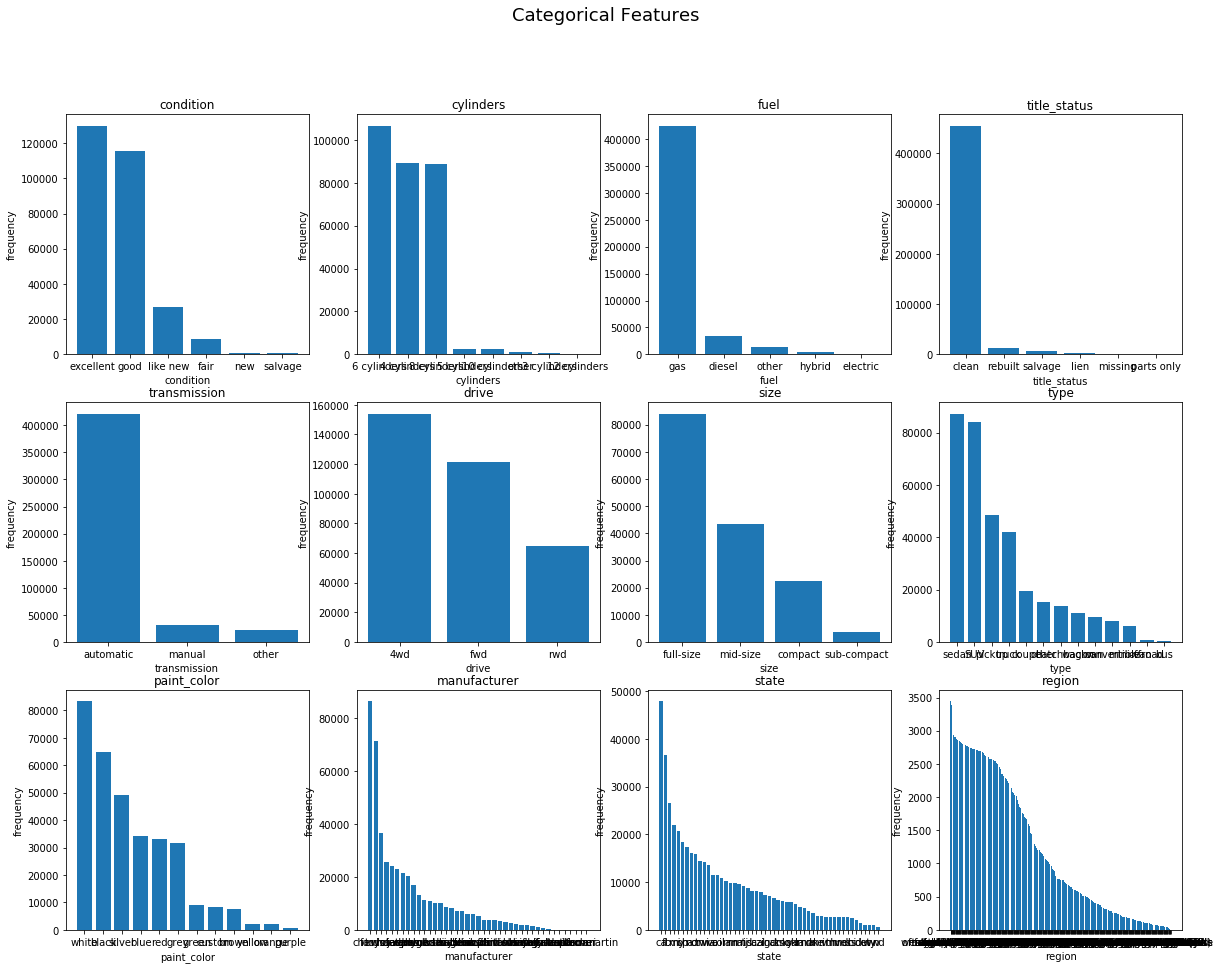

In [ ]:
# Plotting Categorical Features

cat_columns = ['condition','cylinders','fuel','title_status', 'transmission',
                     'drive','size','type','paint_color', 'manufacturer', 'state','region','model']
fig4, ax4 = plt.subplots(3,4, figsize=(20,15))

for row in range(len(ax4)):
    for col in range(len(ax4[0])):
        i = 4*row + col
        if i < len(cat_columns) and cat_columns[i] != 'model':
            ax4[row, col].bar(
                list(whole_data_2[cat_columns[i]].value_counts().keys()),
                list(whole_data_2[cat_columns[i]].value_counts().values))
            ax4[row, col].set_xlabel(cat_columns[i])
            ax4[row, col].set_ylabel('frequency')
            ax4[row, col].title.set_text(cat_columns[i])
fig4.suptitle('Categorical Features', fontsize=18);


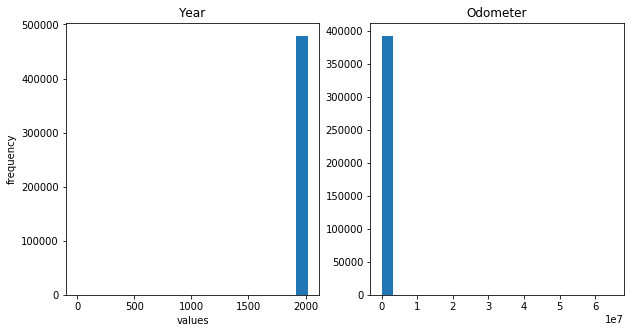

In [ ]:
# Plotting Continuous Features 

fig,ax = plt.subplots(1,2, figsize=(10,5))
ax[0].hist(whole_data_2['year'], bins=20)
ax[1].hist(whole_data_2['odometer'], bins=20)

for i in range(1):
    ax[i].set_ylabel('frequency')
    ax[i].set_xlabel('values')

ax[0].title.set_text('Year')
ax[1].title.set_text('Odometer');

Based on the plots shown above, it is difficult to fully understand the distribution of the continuous features, thus, it might be necessary to first identify the outliers for these features and based on their values, remove them accordingly.

51587.25 141118.0 89530.75
-82708.875
275414.125


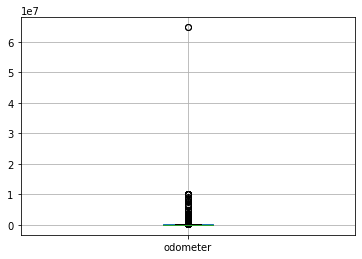

In [ ]:
# Odometer has outliers 
whole_data_2.boxplot('odometer')

Q5 = whole_data_2['odometer'].quantile(0.25)
Q6 = whole_data_2['odometer'].quantile(0.75)
IQR5 = Q6 - Q5
print(Q5, Q6, IQR5)
print(Q5 - 1.5 * IQR5)
print(Q6 + 1.5 * IQR5)

# Then, remove outlier odometer 
remove_outlier1 = (whole_data_2['odometer'] >= Q5 - 1.5 * IQR5) & (whole_data_2['odometer'] <= Q6 + 1.5 * IQR5)
whole_data_3 = whole_data_2.loc[remove_outlier1] 

plt.show()


2006.0 2015.0 9.0


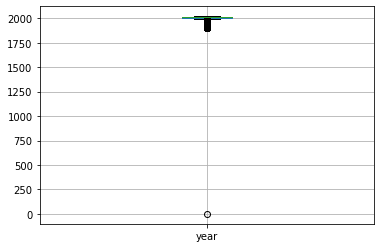

In [ ]:
# Year has 0 
whole_data_2.boxplot('year')

Q7 = whole_data_2['year'].quantile(0.25)
Q8 = whole_data_2['year'].quantile(0.75)
IQR7 = Q8 - Q7
print(Q7, Q8, IQR7)

# # Then, remove outlier year 
# remove_outlier1 = (whole_data_2['year'] >= Q7 - 1.5 * IQR7) & (whole_data_2['year'] <= Q8 + 1.5 * IQR7)
# whole_data_4 = whole_data_3.loc[remove_outlier1] 

# plt.show()

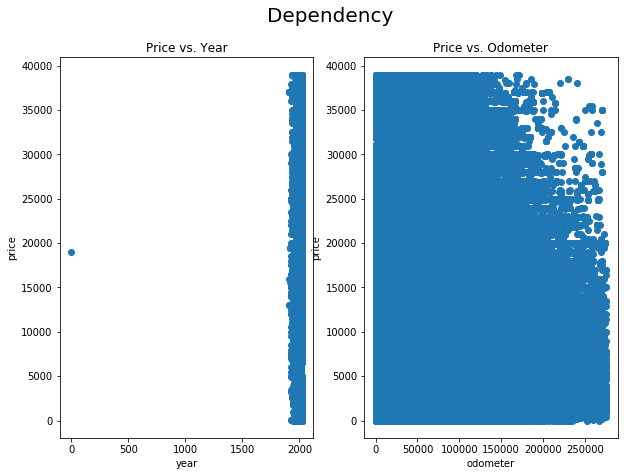

In [ ]:
# Visualize the dependency of the target on each continuous feature (2d scatter plot)
continuous =  ['year', 'odometer']

fig1,ax1 = plt.subplots(1,2, figsize=(10,7))
ax1[0].scatter(whole_data_3['year'], whole_data_3['price'])
ax1[0].title.set_text('Price vs. Year')
ax1[0].set_xlabel('year')
ax1[0].set_ylabel('price')

ax1[1].scatter(whole_data_3['odometer'], whole_data_3['price'])
ax1[1].title.set_text('Price vs. Odometer')
ax1[1].set_xlabel('odometer')
ax1[1].set_ylabel('price')

fig1.suptitle("Dependency", fontsize=20);

In [ ]:
whole_data_2.corr()

,id,price,year,odometer,county,lat,long
id,1.000000,-0.024748,0.003466,-0.019338,NaN,-0.065714,-0.070956
price,-0.024748,1.000000,0.347527,-0.163985,NaN,0.048290,-0.135765
year,0.003466,0.347527,1.000000,-0.143998,NaN,0.002113,0.006604
odometer,-0.019338,-0.163985,-0.143998,1.000000,NaN,0.008495,0.011104
county,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lat,-0.065714,0.048290,0.002113,0.008495,NaN,1.000000,-0.153105
long,-0.070956,-0.135765,0.006604,0.011104,NaN,-0.153105,1.000000


For the continuous variables, no clear correlation among the features are visible, as the correlation values are extremely small. `year` and `price` have a slightly positive correlation 0.3475 compared to other features, and `odometer` and `price` have a slightly negative correlation -0.1640. 

### Task 2 Preprocessing and Baseline Model

In [ ]:
#first sample 25% data
#train test split (validation) 

df = whole_data_3.drop(columns=['id','description', 'url', 'region_url', 'image_url', 'vin', 
                                'county', 'lat','long'])
df_sample = df.sample(frac=0.25, random_state=42)


X = df_sample.loc[:, ~df.columns.isin(['price'])]
y = df_sample['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


cat_preprocessing = make_pipeline(
    SimpleImputer(strategy='constant', fill_value='NA'), 
    OneHotEncoder(handle_unknown='ignore')
    )

cont_preprocessing = make_pipeline(
    SimpleImputer(),
    StandardScaler())

preprocess = make_column_transformer(
    (cat_preprocessing, make_column_selector(dtype_include='object')),
    remainder=cont_preprocessing)

# pipe = Pipeline([('preprocessing', preprocess),('Ridge',Ridge)])
# param_grid = {'ridge__regressor__alpha':np.logspace(-3,3,13)}
# grid = GridSearchCV(pipe, param_grid, cv=RepeatedKFold(10,5),
#                    return_train_score=True)
# grid.fit(X_train, y_train)

print("Cross-validation score for Basline Model (Ridge): ", 
      np.mean(cross_val_score(make_pipeline(preprocess, Ridge()), 
                              X_train, y_train, cv=5, scoring='r2')))

Cross-validation score for Basline Model (Ridge):  0.7035023030980077


In [ ]:
df.corr()

,price,year,odometer
price,1.000000,0.396641,-0.486012
year,0.396641,1.000000,-0.379780
odometer,-0.486012,-0.379780,1.000000


After some additional preprocessing and sampling of the variables, the correlation between `price` and `year` (0.3966), as well as `price` and `odometer` (-0.4860) became larger.

### Task 3 Feature Engineering


In [ ]:
##### For categorical features with many unique values, could use TargetEncoding
# other categorical features: OneHotEncoder

cat_columns_target = ['region','model']
cat_columns_onehot = ['condition','cylinders','fuel','title_status', 'transmission',
                     'drive','size','type','paint_color', 'manufacturer', 'state']
cont_columns = ['year', 'odometer'] 


cat_target_preprocessing = make_pipeline(
    TargetEncoder()) 

cat_preprocessing_1 = make_pipeline(
    SimpleImputer(strategy='constant', fill_value='NA'), 
    OneHotEncoder(handle_unknown='ignore')
    )

cont_preprocessing_1 = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler(),
    PolynomialFeatures(degree=5, include_bias=False))

preprocess_1 = make_column_transformer(
    (cat_target_preprocessing, cat_columns_target),
    (cat_preprocessing_1, cat_columns_onehot),
    (cont_preprocessing_1, cont_columns)
    )

log_regressor = TransformedTargetRegressor(
    LinearRegression(), func=np.log, inverse_func=np.exp)

print("Cross-validation score with Feature Engineering & LinearRegression: ", 
      np.mean(cross_val_score(make_pipeline(preprocess_1, LinearRegression()), 
                              X_train, y_train, cv=5, scoring='r2')))


#Having onehot seems to be better
#log_regressor also dont seem to be useful..

Cross-validation score with Feature Engineering & LinearRegression:  0.7202174469128865


Compared to the previous model, by incorporating TargetEncoding for categorical variables with large number of unique values and adding PolynomialFeatures, this LinearRegression model has a higher mean cross-validation score.

### Task 4 Any Model

In [ ]:
labels = ['region','manufacturer', 'model', 'cylinders',
       'fuel','title_status', 'transmission', 'drive', 'size',
       'condition','type', 'paint_color', 'state']
les = {}
X_train_1 = copy.deepcopy(X_train)
y_train_1 = copy.deepcopy(y_train)

# # X_train_1.info() #72833 -> 72710
# # X_train_1.year.isnull().sum()

# cat_ordinal_preprocessing = make_pipeline(
#     OrdinalEncoder(categories = ['new','like new','excellent','good', 'fair','salvage']))

cat_target_preprocessing = make_pipeline(
    TargetEncoder()) 

cont_preprocessing = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler())

# Identifying row indices that have year = 0 
idx = X_train_1['year'].index[X_train_1['year'].apply(np.isnan)]
X_idx = X_train_1.index.values.tolist()
nan_list = [X_idx.index(i) for i in idx]

# Dropping rows that have year = 0 in X_train and y_train
X_train_1.drop(X_train_1.index[nan_list], inplace=True)
y_train_1.drop(y_train_1.index[nan_list], inplace=True)


preprocess_2 = make_column_transformer(
    (cat_target_preprocessing, labels),
    (cont_preprocessing, cont_columns)
    )

print("Cross-validation score for RandomForestRegressor: ", 
      np.mean(cross_val_score(make_pipeline(preprocess_2, 
      RandomForestRegressor(warm_start=True,random_state=0,oob_score=True)),
      X_train_1, y_train_1, cv=5)))


Cross-validation score for RandomForestRegressor:  0.8164159352259011


In [ ]:
# Tuning max_features for RandomForestRegressor
pipe = make_pipeline(preprocess_2, 
                         RandomForestRegressor(warm_start=True,random_state=0,oob_score=True))


param_grid = {'randomforestregressor__max_features':range(1, 64, 5)}

grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, return_train_score=True)
grid.fit(X_train_1, y_train_1)
rf_best = grid.best_estimator_

grid.best_params_


{'randomforestregressor__max_features': 6}

In [ ]:
# RandomForestRegressor on test data
grid.score(X_test, y_test)

0.8380289739108816

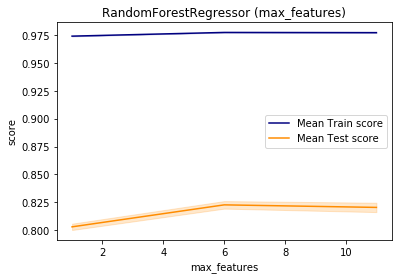

In [ ]:
# RandomForestRegressor CV score

max_features = range(1, 64, 5)

train_scores_mean = grid.cv_results_["mean_train_score"]
train_scores_std = grid.cv_results_["std_train_score"]
test_scores_mean = grid.cv_results_["mean_test_score"]
test_scores_std = grid.cv_results_["std_test_score"]

plt.figure()
plt.title('RandomForestRegressor (max_features)')
plt.xlabel('max_features')
plt.ylabel('score')
# plot train scores
plt.plot(max_features, train_scores_mean, label='Mean Train score',
             color='navy')
# create a shaded area between [mean - std, mean + std]
plt.gca().fill_between(max_features,
                       train_scores_mean - train_scores_std,
                       train_scores_mean + train_scores_std,
                       alpha=0.2,
                       color='navy')
plt.plot(max_features, test_scores_mean,
             label='Mean Test score', color='darkorange')

# create a shaded area between [mean - std, mean + std]
plt.gca().fill_between(max_features,
                       test_scores_mean - test_scores_std,
                       test_scores_mean + test_scores_std,
                       alpha=0.2,
                       color='darkorange')

plt.legend(loc='best')
plt.show()

In [ ]:
# Tune parameters for decision tree regressor

param_grid_1 = {'decisiontreeregressor__max_depth':range(1,20),
              'decisiontreeregressor__min_samples_split':range(50,60)}
pipe_1 = make_pipeline(preprocess_1, 
                         DecisionTreeRegressor(random_state=0))

grid_1 = GridSearchCV(pipe_1, param_grid=param_grid_1, cv=5, return_train_score=True)
grid_1.fit(X_train_1, y_train_1)

print(grid_1.score(X_train_1, y_train_1))


0.8413179320941462


In [ ]:
print(grid_1.best_params_)

{'decisiontreeregressor__max_depth': 15, 'decisiontreeregressor__min_samples_split': 52}


In [ ]:
grid_1.best_estimator_.score(X_test, y_test)

0.7496009922447876

By comparing a RandomForestRegressor with a DecisionTreeRegressor and tuning the parameters as appropriate (`max_features` for RandomForestRegressor and `max_depth` and `min_samples_split` for DecisionTreeRegressor), we can state that RandomForestRegressor has a slightly better performance compared to the DecisionTree. In terms of the parameters, the best parameter value for `max_features` in RandomForestRegressor was 6, and the best values for `max_depth` and `min_samples_split` in DecisionTree were 15 and 52, respectively.

### Task 5 Feature Selections


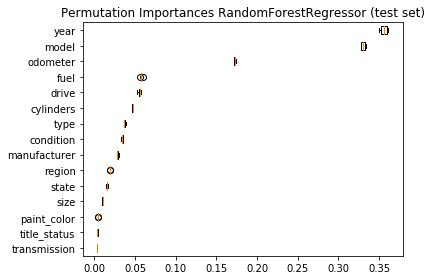

In [ ]:
# Permutation Importance (RandomForestRegressor)

result = permutation_importance(grid.best_estimator_, 
                       X_test, y_test)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=X_test.columns[sorted_idx])
ax.set_title("Permutation Importances RandomForestRegressor (test set)")
fig.tight_layout()
plt.show()

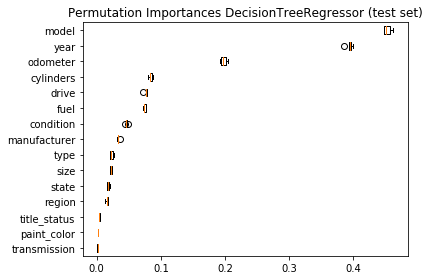

In [ ]:
# Permutation Importance (DecisionTreeRegressor)

result_1 = permutation_importance(grid_1.best_estimator_, 
                       X_test, y_test)
sorted_idx_1 = result_1.importances_mean.argsort()

fig2, ax2 = plt.subplots()
ax2.boxplot(result_1.importances[sorted_idx_1].T,
           vert=False, labels=X_test.columns[sorted_idx_1])
ax2.set_title("Permutation Importances DecisionTreeRegressor (test set)")
fig2.tight_layout()
plt.show()

By observing the permutation importance for both RandomForestRegressor and DecisionTreeRegressor, we can note that `paint_color`, `title_status`, and `transmission` are the least influential features. On the other hand, `model`, `year`, and `odometer` are most influential for both models. Since the less important features are already given little importance in determining the model, it is not likely that removing such features would make the model better. 

### Task 6 An Explainable Model


Initially, to build an "explainable" model, I selected the top-three features from the previous task (`model`, `year`, `odometer`).  

0.6139201352316251
0.5829465437583853


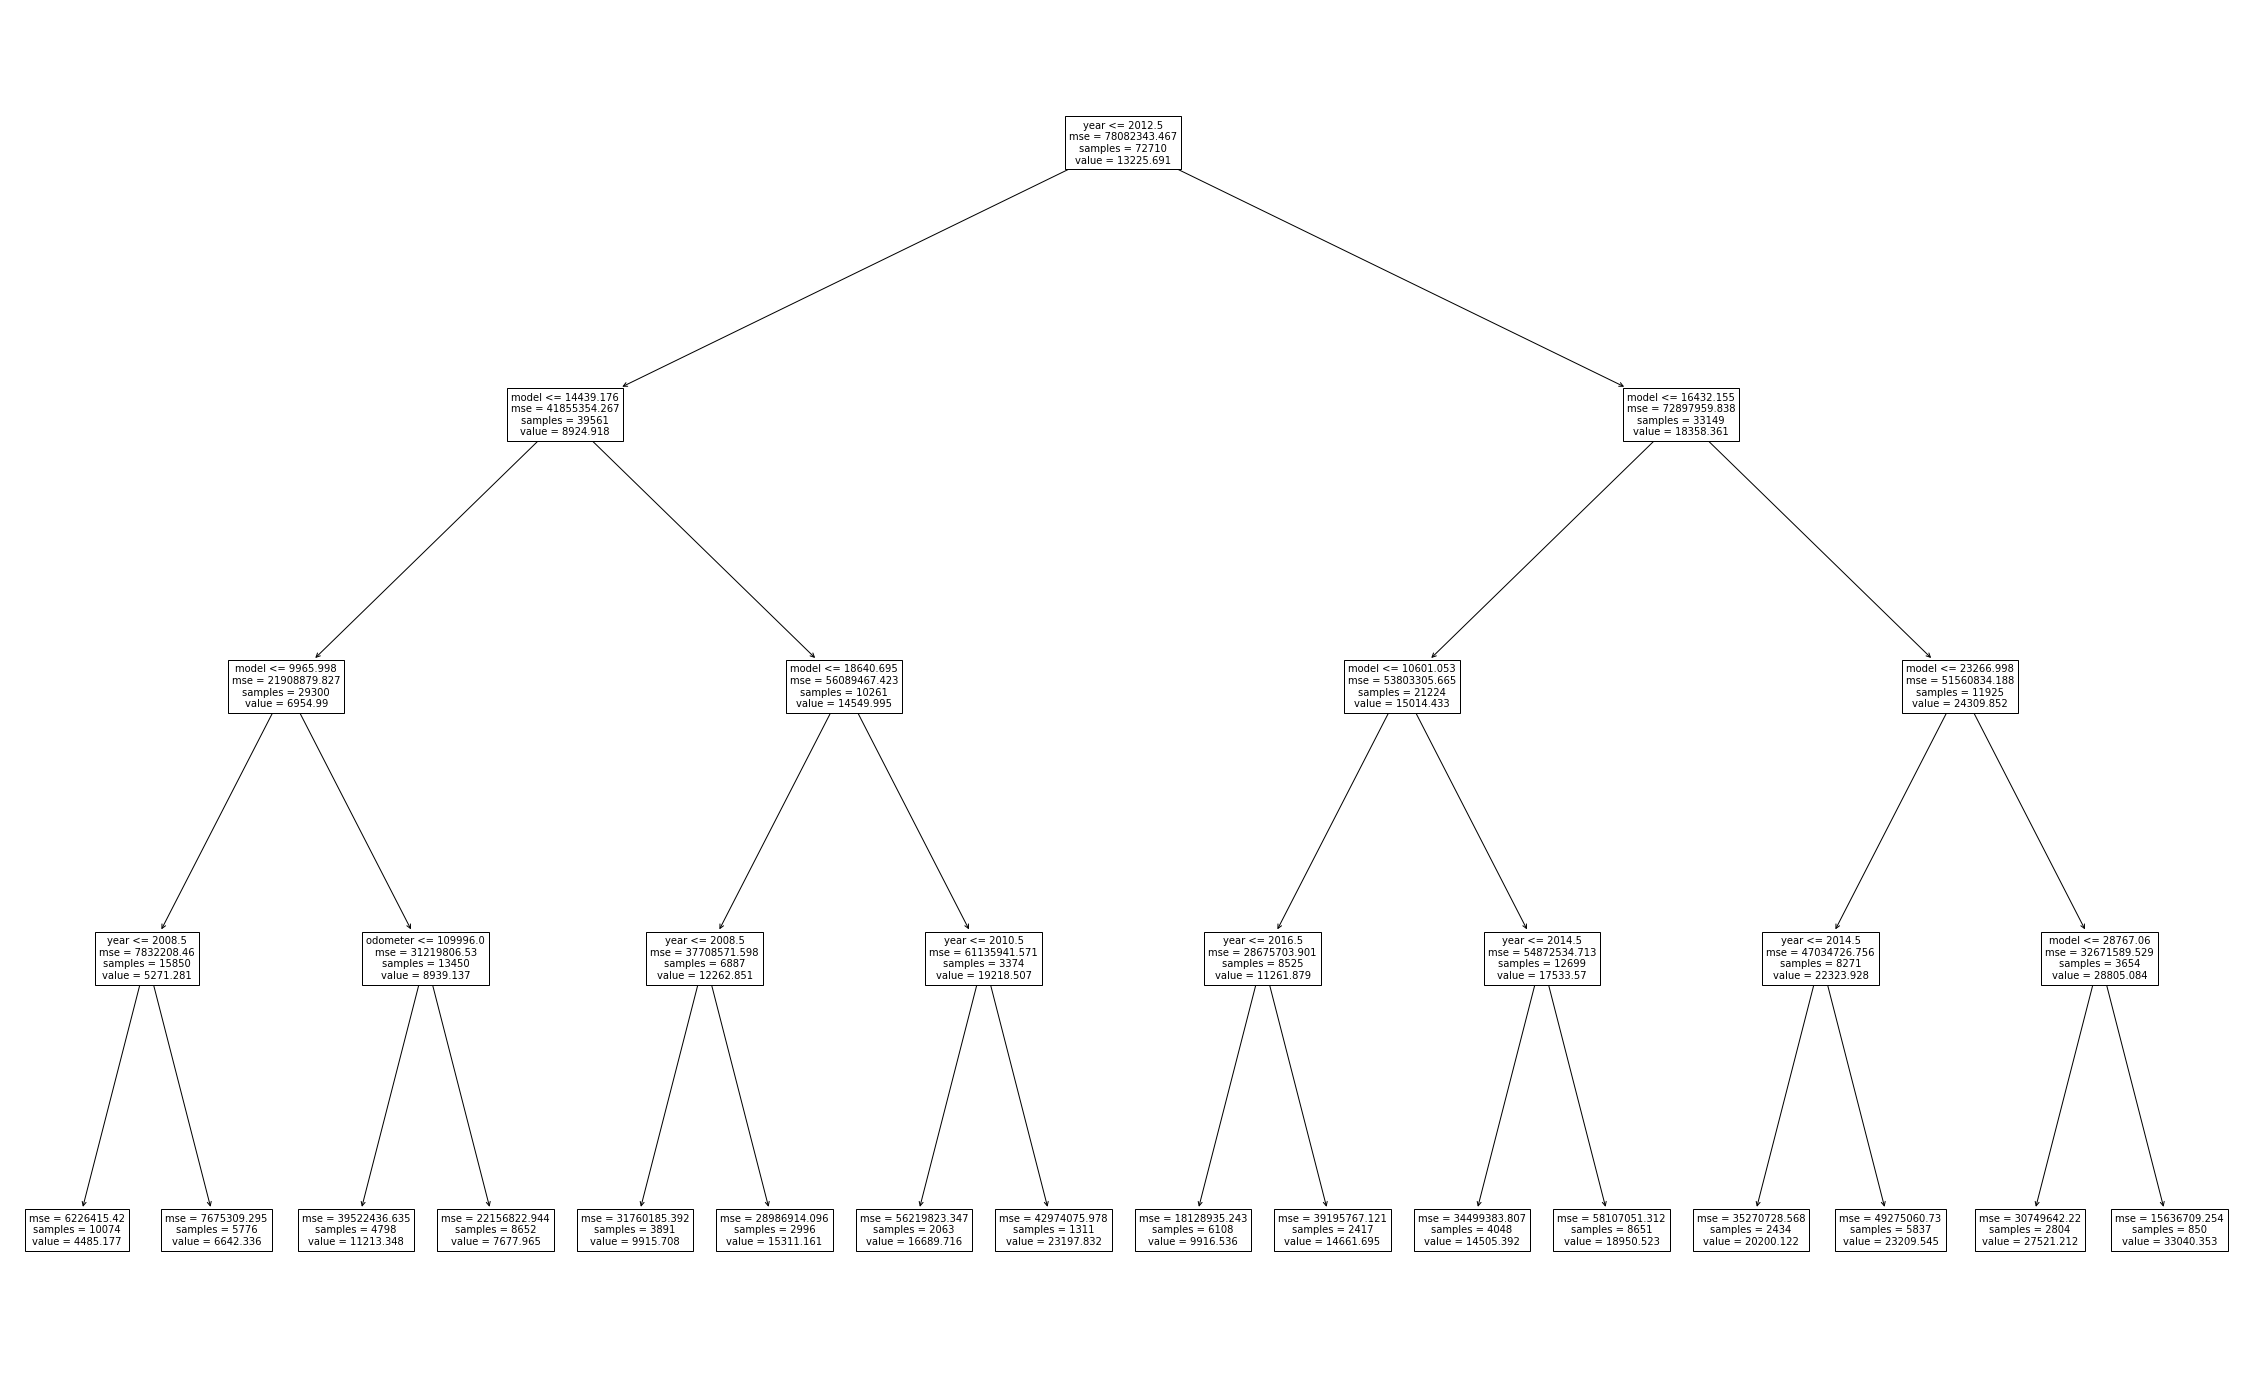

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.tree import plot_tree

cont_ = ['year', 'odometer']
cat_ = ['model']

X_train_new = X_train_1[['year', 'odometer', 'model']] #'cylinders'
X_test_new = X_test[['year', 'odometer', 'model']]

cont_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))])
    #('scaler', StandardScaler())])

cat_transformer = Pipeline(steps=[
    ('target_encoder', TargetEncoder())])

    
final_transformer = ColumnTransformer(
    transformers=[
        ('cont', cont_transformer, cont_),
        ('cat', cat_transformer, cat_)
    ])


model = Pipeline(steps=[('preprocessor', final_transformer),
                       ('tree', DecisionTreeRegressor(max_depth= 4))])


model.fit(X_train_new, y_train_1)
print(model.score(X_train_new, y_train_1))
print(model.score(X_test_new, y_test))

fig5, ax5 = plt.subplots(1, figsize=(40,25))

tree_dot = plot_tree(model._final_estimator, feature_names = X_train_new.columns, fontsize=10, ax=ax5)

While this "explainable" model is not as good as the best model, we can observe that for this specific decision tree, the first split is based on the year, where cars manufactured before 2012 were are on the left of the tree, and ones manufactured later are on the right of the tree. Then, based on the target-encoded `model` feature, the tree is further split. The third and final split was mostly based on the `year` feature, indicating that the manufactured date (for this specific model) plays an important role in reducing the impurity. 

In [ ]:
cont_transformer_1 = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

cat_transformer = Pipeline(steps=[
    ('target_encoder', TargetEncoder())])

    
final_transformer_1 = ColumnTransformer(
    transformers=[
        ('cont', cont_transformer_1, cont_),
        ('cat', cat_transformer, cat_)
    ])


model_1 = Pipeline(steps=[('preprocessor', final_transformer_1),
                       ('ols', LinearRegression())])


model_1.fit(X_train_new, y_train_1)
print(model_1.score(X_train_new, y_train_1))
print(model_1.score(X_test_new, y_test))

coefs = model_1._final_estimator.coef_
intercept = model_1._final_estimator.intercept_

print("price = ", coefs[0],"*year ", coefs[1],"*odometer + ", coefs[2],"*model + ", intercept )

0.6017691022808651
0.5626867969844495
price =  1692.6896052784045 *year  -2555.4459834038403 *odometer +  0.8749612698305316 *model +  1649.5574743613415


Based on this "explainable" LinearRegression model, the coefficients are extremely large for year and odometer, where year has a positive coefficient and odometer has a negative coefficient. This is in line to a certain extent with the initial correlation evaluation where `price` and `year` had a slightly positive correlation and `price` and `odometer` had a slightly negative correlation. While this simple linear model also does not perform as well as the best model, it is still in line with the fact that these three features describe the model to a certain extent.